In [1]:
import tweepy

consumer_key = 'XRtIm1Mnhk3ktpacwMzeGz1V0'
consumer_secret = 'kQoQpgLNsgGJ5VBPEqs3II92BvjeriXOdLWAVoeoY84t30TNgE'
access_token = '1633497956-vgq9BrDZmihmPPHexldU9oObEchUbhbChonPwYu'
access_token_secret = 'mFA16Mz93Iz4WTcoADchemO8lzPC4SB1fgaamWejkohVA'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

#Comprobar que funciona la api
status = api.get_status('937349434668498944')
print(status.user.id)
user = api.get_user(status.user.id)
print(user.screen_name)

4219197432
OfeliasHeaven


In [91]:
import time
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

def get_tweet_status(tweet_id):
    '''
    Devuelve un objeto status con todos los datos de un tweet
    '''
    return api.get_status(tweet_id)

def get_user_by_id(id):
    '''
    Devuelve un objeto user a traves del id del user
    '''
    return api.get_user(id)
    
    
def get_screen_name_from_tweet(tweet_id):
    try:
        status = api.get_status(tweet_id)
        user = get_user_by_id(status.user.id)
        screen_name = user.screen_name
        return screen_name
    except tweepy.TweepError as e:
        return ('SuspendedAccount')    

def get_followers_page(screen_name):
    '''
    Devuelve los ids de los usuarios que sigue un user, screen_name es el nombre de usuario sin el '@'
    ej @NelsonMandela -> NelsonMandela
    '''
    ids = []
    for page in tweepy.Cursor(api.followers_ids, screen_name="OfeliasHeaven").pages():
        ids.extend(page)
        #time.sleep(60)
    return ids

def get_followers_limited(screen_name, total):
    '''
    Devuelve los ids de los usuarios que sigue un user, screen_name es el nombre de usuario sin el '@'
    ej @NelsonMandela -> NelsonMandela
    Obtiene solo un numero de ids de usuarios indicado en el parametro total
    '''
    ids = []
    for page in tweepy.Cursor(api.followers_ids, screen_name="OfeliasHeaven").items(total):
        ids.append(page)
    return ids

def get_followers_from_tweet_id(tweet_id, total = 0):
    '''
    Pasandole el id de un tweet obtenemos todos sus seguidores,
    se le puede pasar el parametro total y obtener solamente un numero concreto de ids
    '''
    user_id = get_tweet_status(tweet_id).user.id
    screen_name = get_user_by_id(user_id).screen_name
    if total == 0:
        followers_ids = get_followers_page(screen_name)
    else:
        followers_ids = get_followers_limited(screen_name,total)
    return followers_ids
    
    

def get_tweets(num_noticias):
    '''
    Le pasamos el numero de noticias de las cuales queremos obtener los tweets_ids
    Con el DataFrame de Pandas separamos los tweets de una misma noticia
    Devuelve un array de [titulos, array(tweets_ids)]
    '''
    df = pd.read_csv('./data/politifact_fake.csv') 
    #Esto se puede cambiar por otro dataset (ej: ./data/politifact_real.csv), pero de momento trabajamos con este
    df['tweet_ids'][0].split('\t')
    
    titulo = []
    tweets = []
    i = 0
    
    for tweet in df['tweet_ids']:
        if i < num_noticias:
            array_tweets = str(tweet).split('\t')
            #Se puede cambiar a que tenga al menos 5 o 10 tweets para probar
            if(len(array_tweets) > 1 and len(array_tweets) < 2000): #Solo si tiene algun tweet lo añadimos, 1 elemento es NaN
                tweets.append(array_tweets)
                titulo.append(df['title'][i])
                i = i+1
    noticias = [titulo, tweets]
    return noticias 

In [126]:
import numpy as np
#Ejemplos de prueba
print(get_screen_name_from_tweet('937349434668498944'))
print(get_tweet_status('937349434668498944').user.id)
print(get_user_by_id('4219197432').screen_name)
print(get_followers_limited('OfeliasHeaven',10))
#print(get_followers_from_tweet_id('937349434668498944'))
print("Noticia: ", noticias[0][0],"\nTweet: ",noticias[1][0][0]) #Primer tweet de la primera noticias

OfeliasHeaven
4219197432
OfeliasHeaven
[551281483, 438051989, 730820197939093504, 404472897, 993614707222294528, 27443191, 16207074, 1172351964107038721, 1179754519623684098, 15659178]
Noticia:  BREAKING: First NFL Team Declares Bankruptcy Over Kneeling Thugs 
Tweet:  937349434668498944


94683
Num Maximo de Tweets: 1915 | Noticia Nº:  366
Nº Noticias en rangos de 200: [239.  51.  22.  22.   6.  18.   3.   3.   1.   2.]


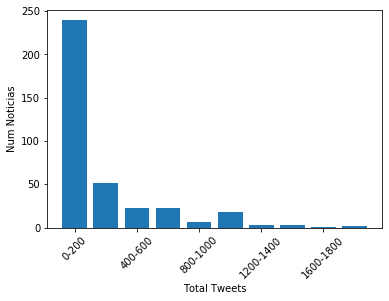

In [127]:
noticias = get_tweets(num_noticias=367)
total_tweets = 0
max_tweet = 0
number = 0
arrayPlot = np.zeros(10)
for i in range(len(noticias[1])):
    total_tweets = total_tweets + len(noticias[1][i])
    arrayPlot[len(noticias[1][i]) // 200] += 1
    if(max_tweet < len(noticias[1][i])):
        max_tweet = len(noticias[1][i])
        number = i                
print(total_tweets)
print("Num Maximo de Tweets:", max_tweet, "| Noticia Nº: ", i)
print("Nº Noticias en rangos de 200:",arrayPlot)

plt.bar(range(10),arrayPlot)
plt.xticks(range(0,10,2), ['0-200','400-600','800-1000','1200-1400','1600-1800'],rotation=45)
plt.ylabel("Num Noticias")
plt.xlabel("Total Tweets")
plt.show()

In [141]:
name_dict = {}

for i,v in enumerate(noticias[1]):
    for j, t in enumerate(v):
        name = get_screen_name_from_tweet(v[j])
        if name != 'SuspendedAccount':
            if name in name_dict:
                name_dict[name] = name_dict[name] + 1
            else:
                name_dict[name] = 1

KeyboardInterrupt: 

In [143]:
for x, y in name_dict.items():
    if(y > 1):
        print(x, y) 

OfeliasHeaven 2
SuspendedAccount 1349
yojudenz 3
kin2souls 2
toppertaco 2
blaze0497 3
obamolizer 3
WPubEBwilkes 3
cinders1313 2
LyleKlich 2
Sanctus_Christ 5
jadwolfer 2
LeadStoriesCom 2
Auxi13Sheila 2
coopah 4
Daity1 3
chrisdanne2 3
urjkary0987 5
PattiCucchiara 2
AMISTAD604 2
mscgluk 14
benzionjohannon 3
OOsal 2
gritslady 2
destinygroove 2
briheller 5
indig7 2
BKaysac 2
debra0120 3
elkepoley 2
sycipft 2
777Francejacque 2
IJNIPGM 2
denisedebranch 2
Revive_Hope 2
lallo869 7
Imconservative2 2
KeithDShrock 2
johneebegood2 2
legaleaglesoars 2
PatriciaAHenso1 2
LewterG 2
1861_again 2
Ambasstek 2
